In [192]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.linear_model import Perceptron
import pandas as pd
np.random.seed(42)

In [193]:
data= pd.read_csv("data_clean.csv")

In [194]:
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis = 1)

# Chuẩn hóa 
x = x_data
data.sample(frac=1, random_state=42, replace=True)

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
102,102,0,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,...,13.340,32.84,84.58,547.8,0.11230,0.08862,0.11450,0.07431,0.2694,0.06878
435,435,1,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550
270,270,0,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
106,106,0,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
71,71,0,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,223,1,15.750,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,...,19.560,30.29,125.90,1088.0,0.15520,0.44800,0.39760,0.14790,0.3993,0.10640
238,238,0,14.220,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,...,15.750,40.54,102.50,764.0,0.10810,0.24260,0.30640,0.08219,0.1890,0.07796
176,176,0,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,...,11.260,24.39,73.07,390.2,0.13010,0.29500,0.34860,0.09910,0.2614,0.11620
281,281,0,11.740,14.02,74.24,427.3,0.07813,0.04340,0.02245,0.02763,...,13.310,18.26,84.70,533.7,0.10360,0.08500,0.06735,0.08290,0.3101,0.06688


In [195]:
x_train, x_test, y_train, y_test = train_test_split(
	x, y, test_size = 0.15, random_state = 42)

#x_train = x_train.T
#x_test = x_test.T
#y_train = y_train.T
#y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


x train:  (483, 31)
x test:  (86, 31)
y train:  (483,)
y test:  (86,)


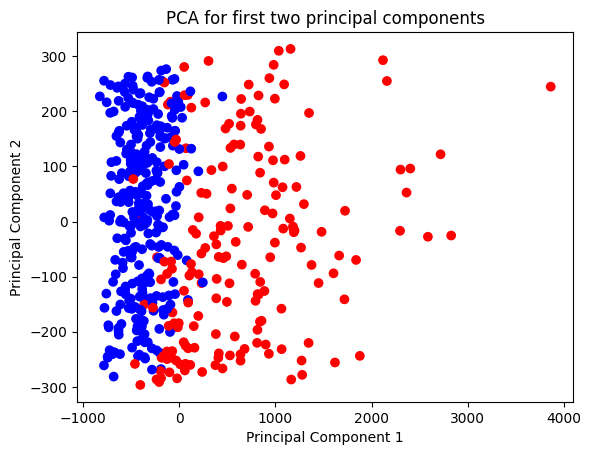

In [196]:
from sklearn.decomposition import PCA

# Sử dụng PCA để giảm chiều dữ liệu xuống còn 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)

# Vẽ biểu đồ scatter plot với 2 thành phần chính từ PCA
color = ['red' if value == 1 else 'blue' for value in y_train]
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', color=color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for first two principal components')
plt.show()


Xây Dựng Thuật Toán

In [197]:
def h(w, x):    
    return np.sign(np.dot(w.T, x))

In [198]:
def has_converged(X, y, w):    
    return np.array_equal(h(w, X), y) 

In [199]:
def perceptron(X, y, w_init):
    N = X.shape[0]
    d = X.shape[1]
    w = w_init
    mis_point_before = []
    mis_point = []
    while True:
        mis_point_before = mis_point.copy()
        mis_point.clear()
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[i]
            yi = y[i]
            Hk = h(w, xi)
            if  Hk[0] != yi:
                mis_point.append(i)
                w_new = w + yi * xi 
                w = w_new
        if len(mis_point) == 0 or len(mis_point) >= len(mis_point_before):
            break
    return (w, mis_point)

In [200]:
y_train_arr = [-1 if i == 0 else 1 for i in y_train]
X_train_arr = x_train.values
d = x_train.shape[1]
w_init = np.random.randn(d, 1)


In [201]:
h(w_init, x_train.iloc[2])[0]

-1.0

In [202]:
(w, m) = perceptron(X_train_arr, y_train_arr, w_init)

In [203]:
len(m)

207

In [204]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=42)
clf.fit(x_train, y_train)
Perceptron()
train = clf.score(x_train, y_train)
test = clf.score(x_test, y_test)

In [205]:
train

0.9213250517598344

In [206]:
test

0.9651162790697675

In [207]:
import joblib
joblib.dump(clf, 'Perceptron.pkl')

['Perceptron.pkl']